# Refactored Procedural Design - Example Usage

**Date:** 05/11/2025

## Overview

This notebook demonstrates the new refactored structure of the procedural design project.

### Key Improvements

1. **Modular Code**: All algorithms are now in `src/algorithms/`
2. **Reusable Utilities**: Geometry operations in `src/geometry/`
3. **End-to-End Pipelines**: Complete workflows in `src/pipelines/`
4. **CLI Tools**: Command-line interface for batch processing
5. **Interactive App**: Streamlit web app for parameter exploration
6. **Comprehensive Tests**: Unit tests for all components


In [1]:
# Add project root to path for development
import sys
from pathlib import Path

# Add the parent directory (procedural-design/) to path
project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# Standard library
import numpy as np
import matplotlib.pyplot as plt

# Our refactored modules (now importing from src.*)
from src.algorithms.gray_scott import GrayScottSimulator, GrayScottConfig
from src.pipelines.vase import VasePipeline, VaseConfig

print("✅ Modules imported successfully!")
print(f"📁 Project root: {project_root}")


[Taichi] version 1.7.4, llvm 15.0.7, commit b4b956fd, osx, python 3.13.7


[I 11/06/25 11:25:09.156 451100] [shell.py:_shell_pop_print@23] Graphical python shell detected, using wrapped sys.stdout


✅ Modules imported successfully!
📁 Project root: /Users/dalerogers/Projects/procedural-design-scratch/procedural-design


## Example: Generate a Vase

Using the refactored pipeline to generate a reaction-diffusion vase.


In [ ]:
# Configure vase generation
vase_config = VaseConfig(
    height=150.0,
    base_size=80.0,
    profile_type='square',
    displacement_amplitude=6.0,
    corner_radius=20.0,
    field_resolution=128,  # Lower for faster testing
    simulation_steps=5000,
    n_seeds=5,
    pattern_type='spots',
    random_seed=42
)

# Create pipeline
pipeline = VasePipeline(vase_config)

# Generate and visualise field
print("Generating pattern...")
pipeline.visualize_field()

# Generate mesh
print("Building mesh...")
mesh = pipeline.generate()

print(f"✅ Generated vase: {len(mesh.vertices):,} vertices, {len(mesh.faces):,} faces")

# Get statistics
stats = pipeline.get_stats()
print(f"\nStatistics:")
print(f"  Volume: {stats['volume_mm3']:.2f} mm³")
print(f"  Surface area: {stats['surface_area_mm2']:.2f} mm²")
print(f"  Watertight: {stats['is_watertight']}")

# Validate
validation = pipeline.validate()
print(f"\nValidation:")
print(f"  Valid for 3D printing: {validation['is_valid']}")


## Example: Generate a Moss Pole

Using the space colonisation algorithm to create perforated structures.


In [ ]:
from src.pipelines.moss_pole import MossPolePipeline, MossPoleConfig

# Configure moss pole
pole_config = MossPoleConfig(
    outer_diameter=50.0,
    wall_thickness=2.0,
    height=200.0,
    tunnel_radius=1.5,
    attractor_count=500,  # Lower for faster testing
    influence_radius=16.0,
    kill_radius=3.5,
    step_size=1.8,
    n_ribs=4,
    rib_width_degrees=10.0,
    random_seed=42
)

# Create pipeline
pole_pipeline = MossPolePipeline(pole_config)

# Generate
print("Generating moss pole...")
pole_mesh = pole_pipeline.generate()

print(f"✅ Generated moss pole: {len(pole_mesh.vertices):,} vertices, {len(pole_mesh.faces):,} faces")

# Get statistics
pole_stats = pole_pipeline.get_stats()
print(f"\nStatistics:")
print(f"  Volume: {pole_stats['volume_mm3']:.2f} mm³")
print(f"  Open fraction: {pole_stats['open_fraction']:.1%}")
print(f"  Branches: {pole_stats['n_branches']}")
print(f"  Watertight: {pole_stats['is_watertight']}")


## Export Options

Export meshes to various formats.


In [ ]:
from pathlib import Path

# Create output directory
output_dir = Path("../outputs/meshes/stl")
output_dir.mkdir(parents=True, exist_ok=True)

# Export vase
vase_path = output_dir / "example_vase.stl"
pipeline.export(vase_path, file_format='stl')
print(f"✅ Vase exported to {vase_path}")

# Export moss pole
pole_path = output_dir / "example_moss_pole.stl"
pole_pipeline.export(pole_path, file_format='stl')
print(f"✅ Moss pole exported to {pole_path}")


## Using the CLI Tools

The refactored code also provides command-line tools for batch processing.

### Generate Vase from CLI

```bash
python src/cli/generate_vase.py \
    --height 200 \
    --base-size 90 \
    --profile square \
    --pattern waves \
    --steps 10000 \
    --output outputs/meshes/stl/vase_cli.stl \
    --stats \
    --validate
```

### Generate Moss Pole from CLI

```bash
python src/cli/generate_moss_pole.py \
    --diameter 50 \
    --height 250 \
    --attractors 2000 \
    --output outputs/meshes/stl/pole_cli.stl \
    --stats \
    --validate
```

## Running the Streamlit App

For interactive parameter exploration:

```bash
cd src/app
streamlit run streamlit_app.py
```

This will open an interactive web interface where you can adjust parameters in real-time and see the results.


## Example: Process a Template Mesh

Apply Gray-Scott patterns to an existing mesh (e.g., from Fusion360).


Generating pattern...

Generating pattern (10000 steps)...
  ✓ Pattern generated


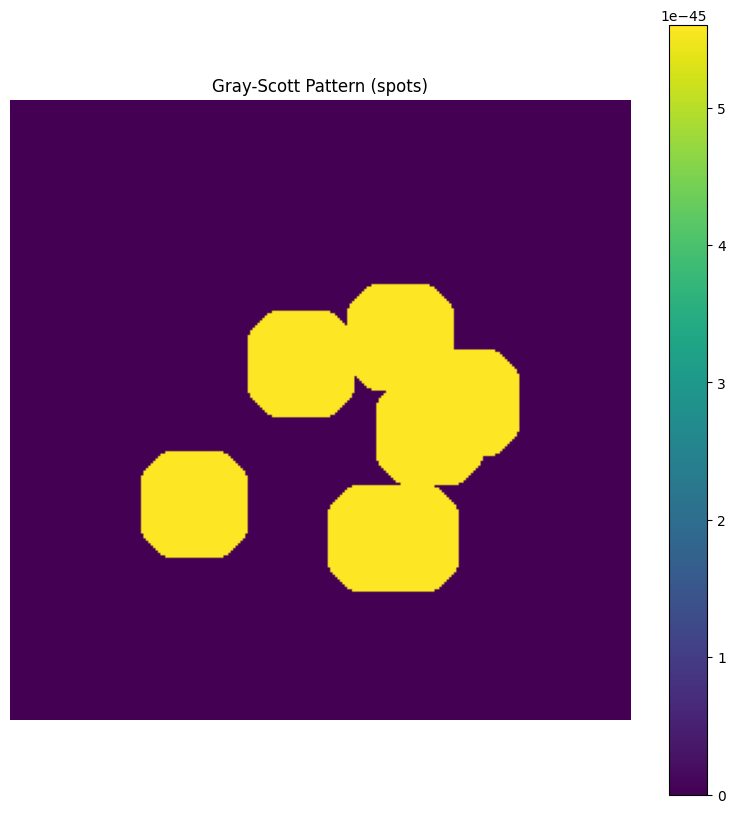


Processing template mesh...
Loading template: ../data/templates/stl/Gray-Scott Vase v1.stl
  Vertices: 4,577
  Faces: 9,150
  ✓ Template is watertight

Generating pattern (10000 steps)...
  ✓ Pattern generated

Applying pattern to mesh...
  ✓ Pattern applied (displacement range: -4.00 to -0.00 mm)

Template Mesh:
  Vertices: 4,577
  Faces: 9,150
  Watertight: True

Processed Mesh:
  Vertices: 4,577
  Faces: 9,150
  Volume: 1658417.79 mm³
  Watertight: True
  ✓ Exported to ../outputs/meshes/stl/processed_template.stl

✅ Processed mesh exported to ../outputs/meshes/stl/processed_template.stl


In [3]:
# Import the mesh processor (make sure cell 1 has been run first!)
from src.pipelines.mesh_processor import MeshProcessorPipeline, MeshProcessorConfig
from pathlib import Path

# Configure mesh processor
template_path = Path("../data/templates/stl/Gray-Scott Vase v1.stl")

processor_config = MeshProcessorConfig(
    template_path=template_path,
    displacement_amplitude=8.0,  # Displacement in mm
    field_resolution=256,  # Pattern resolution
    simulation_steps=10000,  # More steps = finer pattern
    n_seeds=7,
    pattern_type='spots',  # 'spots', 'stripes', 'waves', 'holes'
    random_seed=42,
    taper_top=0.3,  # Reduce displacement at top
    taper_bottom=0.15  # Reduce displacement at bottom
)

# Create pipeline
processor_pipeline = MeshProcessorPipeline(processor_config)

# Generate pattern and visualise
print("Generating pattern...")
processor_pipeline.visualize_field()

# Apply to mesh
print("\nProcessing template mesh...")
processed_mesh = processor_pipeline.generate()

# Get statistics
processor_stats = processor_pipeline.get_stats()
print(f"\nTemplate Mesh:")
print(f"  Vertices: {processor_stats['template_vertices']:,}")
print(f"  Faces: {processor_stats['template_faces']:,}")
print(f"  Watertight: {processor_stats['template_watertight']}")

print(f"\nProcessed Mesh:")
print(f"  Vertices: {processor_stats['output_vertices']:,}")
print(f"  Faces: {processor_stats['output_faces']:,}")
print(f"  Volume: {processor_stats['volume_mm3']:.2f} mm³")
print(f"  Watertight: {processor_stats['is_watertight']}")

# Export
output_path = Path("../outputs/meshes/stl/processed_template.stl")
processor_pipeline.export(output_path)
print(f"\n✅ Processed mesh exported to {output_path}")
